In [19]:
pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=0196848bf5f99c1e8b2709c66489296f5d8d6eda50c2811598f1ffbe4c453a02
  Stored in directory: /Users/jds/Library/Caches/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText
Note: you may need to restart the kernel to use updated packages.


In [176]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from pprint import pprint
import requests
import json
import html
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn as sns
from adjustText import adjust_text

ModuleNotFoundError: No module named 'mplcursors'

In [164]:
csv_merge = "../Resources/newmerge_1416.csv"
df_1416 = pd.read_csv(csv_merge)
#df_1416['ISO'].replace(np.nan, 'NA')
df_1416 = df_1416.fillna("NA")
df_1416

,Region_2014,ISO,ODB-Rank_2014,Country,ODB-Score-Scaled_2014,Readiness-Scaled_2014,Implementation-Innovation-Scaled_2014,Implementation-Social-Scaled_2014,Implementation-Accountability-Scaled_2014,Implementation-Rank_2014,...,Impact-Political-Scaled_2016,Impact-Social-Scaled_2016,Impact-Economic-Scaled_2016,Impact-Rank_2016,E-Government Rank_2016,E-Government Index_2016,E-Participation Index_2016,Online Service Index_2016,Human Capital Index_2016,Telecommunication Infrastructure Index_2016
0,Europe & Central Asia,SE,3,Sweden,83.70,100,67,81,71,4,...,29,50,32,20,6,0.87039,0.76271,0.87681,0.92096,0.81339
1,Europe & Central Asia,FR,4,France,80.21,91,75,79,61,7,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,East Asia & Pacific,NZ,4,New Zealand,80.01,81,76,83,92,3,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364
3,Europe & Central Asia,NL,6,Netherlands,75.79,95,79,82,56,5,...,63,50,47,16,7,0.86586,0.94915,0.92754,0.91830,0.75173
4,Europe & Central Asia,NO,7,Norway,74.59,88,70,83,58,8,...,92,20,58,13,18,0.81168,0.76271,0.80435,0.90306,0.72764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Middle East & North Africa,YE,82,Yemen,5.80,12,8,9,11,81,...,0,0,0,113,174,0.22478,0.13559,0.14493,0.38288,0.14655
75,Sub-Saharan Africa,CM,83,Cameroon,3.77,11,6,6,7,83,...,18,0,0,74,155,0.27591,0.16949,0.21739,0.47938,0.13096
76,Sub-Saharan Africa,ML,84,Mali,3.30,19,2,2,6,86,...,0,0,0,103,182,0.18165,0.06780,0.09420,0.23583,0.21492
77,Latin America & Caribbean,HT,85,Haiti,1.19,5,4,5,7,84,...,0,0,0,99,178,0.19314,0.13559,0.16667,0.31240,0.10036


# E Gov vs ODB 2014

In [136]:
x_axis = df_1416['E-Government Index_2014'] *100
y_axis = df_1416['ODB-Score-Scaled_2014']

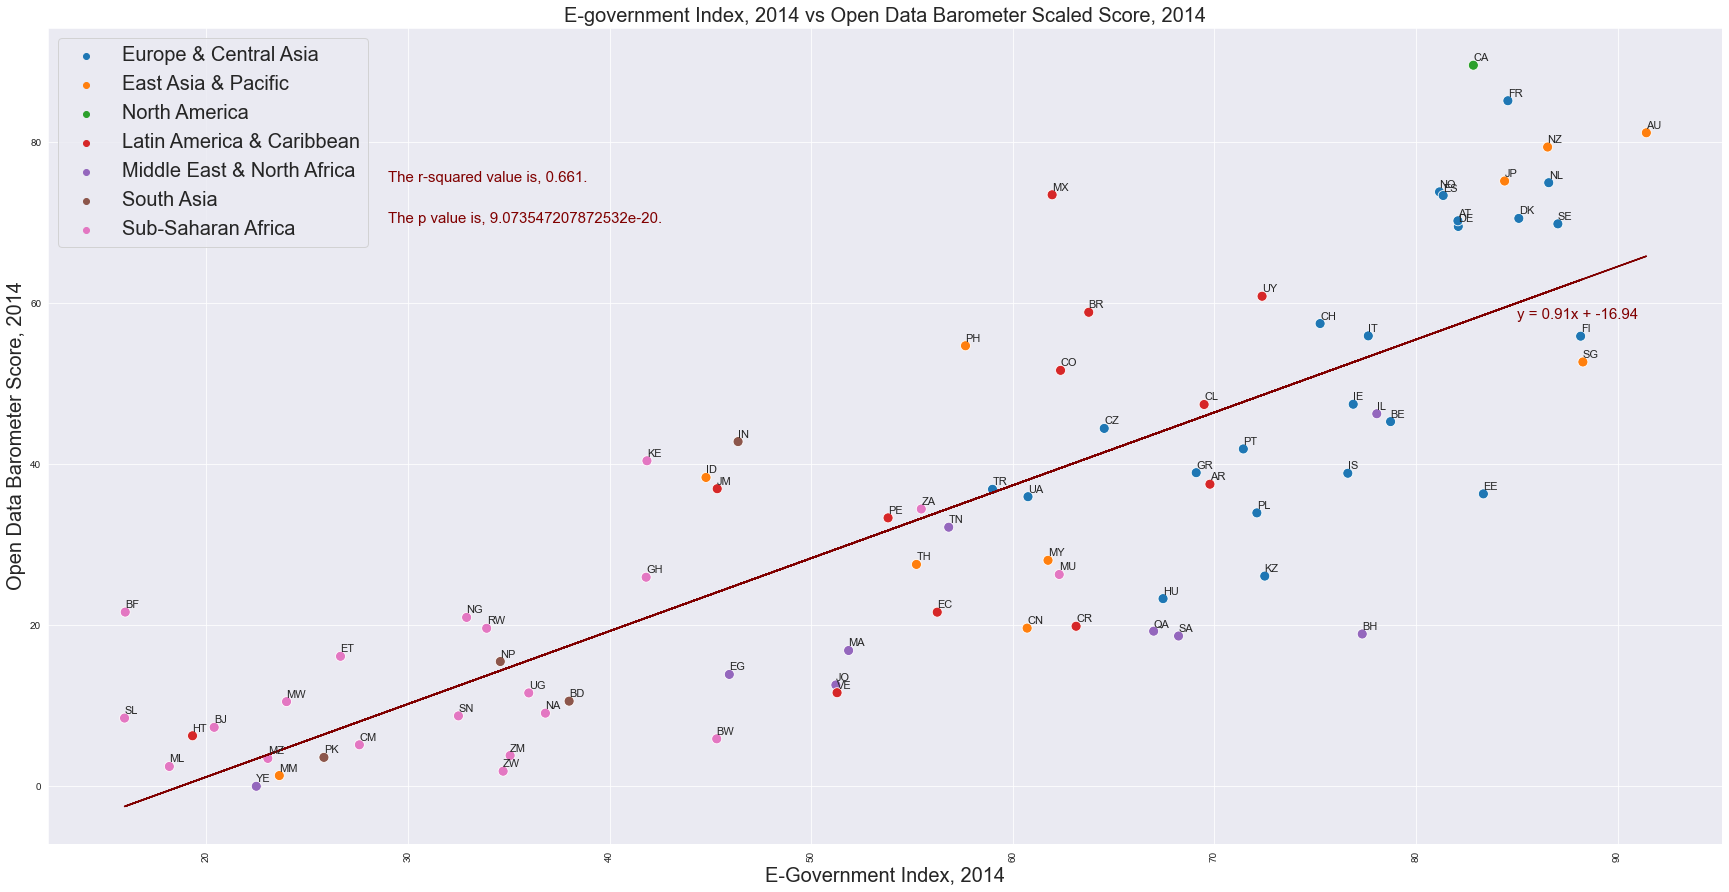

In [240]:
def country_graph(x_axis, y_axis, title, xlabel, ylabel, text_coordinates, coordinates, coordinates2):
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue **2, 3)
    p_value = pvalue
    sns.set_style('darkgrid')
    plt.figure(figsize=(30,15))
    sns.scatterplot(x = x_axis, y = y_axis, data = df_1416, hue = 'Region_2014', s=100)
    sns.axes_style('darkgrid')
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize = 20)
    plt.xticks(rotation=90)
    plt.legend(fontsize = 20)
    plt.tight_layout
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="maroon")
    plt.plot(x_axis,regress_values,"maroon")
    plt.annotate(f"The r-squared value is, {r_squared}.", coordinates, fontsize=15, color='maroon')
    plt.annotate(f"The p value is, {p_value}.", coordinates2, fontsize=15, color= 'maroon')
    for i, label in enumerate(df_1416['ISO']):
        plt.text(x_axis[i], y_axis[i]+1,label, size=11, ha = 'left', va='center_baseline')
    plt.savefig('egov_odb_2014_1.png')
    
country_graph(x_axis, y_axis, "E-government Index, 2014 vs Open Data Barometer Scaled Score, 2014", "E-Government Index, 2014", "Open Data Barometer Score, 2014", (85,58), (29, 75), (29,70))



<Figure size 432x288 with 0 Axes>

In [140]:
x_axis = df_1416['E-Government Index_2016'] *100
y_axis = df_1416['ODB-Score-Scaled_2016']

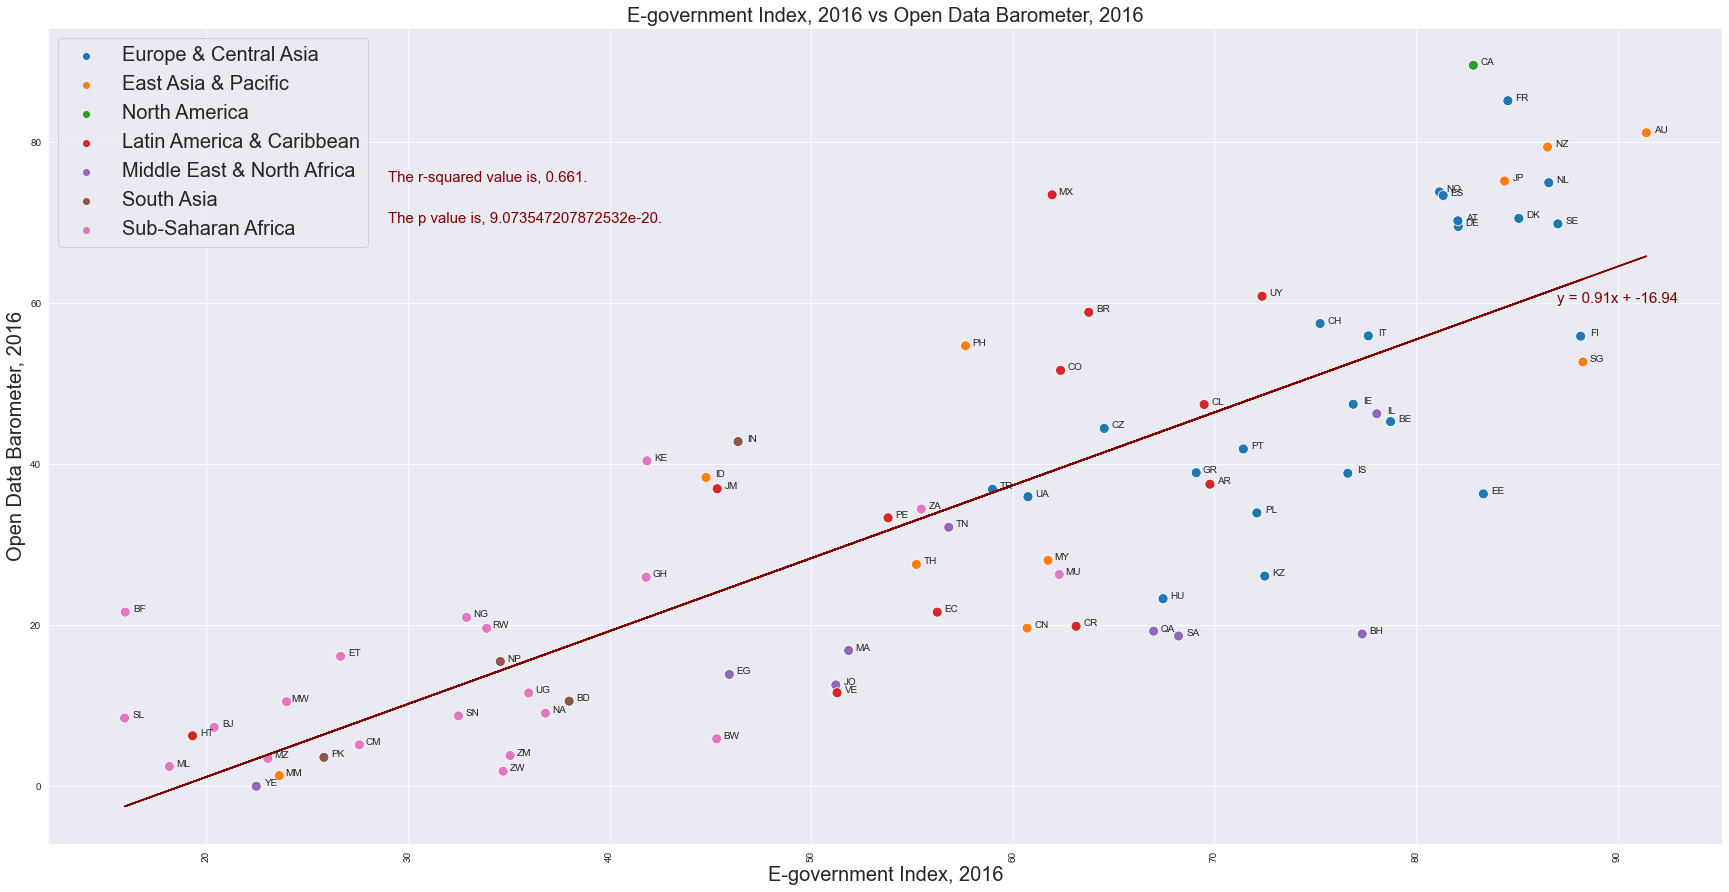

In [241]:
def country_graph(x_axis, y_axis, title, xlabel, ylabel, text_coordinates, coordinates, coordinates2):
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue **2, 3)
    p_value = pvalue
    sns.set_style('darkgrid')
    plt.figure(figsize=(30,15))
    sns.scatterplot(x = x_axis, y = y_axis, data = df_1416, hue = 'Region_2014', s=100)
    sns.axes_style('darkgrid')
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize = 20)
    plt.xticks(rotation=90)
    plt.legend(fontsize = 20)
    plt.tight_layout
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="maroon")
    plt.plot(x_axis,regress_values,"maroon")
    plt.annotate(f"The r-squared value is, {r_squared}.", coordinates, fontsize=15, color='maroon')
    plt.annotate(f"The p value is, {p_value}.", coordinates2, fontsize=15, color= 'maroon')
    for i, label in enumerate(df_1416['ISO']):
        plt.text(x_axis[i]+.7, y_axis[i],label, size=10, ha ='center', va = 'baseline')
    plt.savefig('egov_odb_2016_2.png')
    
country_graph(x_axis, y_axis, "E-government Index, 2016 vs Open Data Barometer, 2016", "E-government Index, 2016", "Open Data Barometer, 2016", (87,60), (29, 75), (29,70))

